In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%config InlineBackend.figure_format = 'retina'

sns.set_theme(style='darkgrid', palette='rocket')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 8
plt.rcParams['savefig.format'] = 'pdf'

In [ ]:
# !pip install pyarrow

In [ ]:
data = pd.read_parquet('train.parquet')
data.head()

ArrowMemoryError: realloc of size 4387840 failed

In [ ]:
data.shape

(48439, 8)

In [ ]:
data['winner'] = np.where(
    data['winner'] == 'model_a',
    data['model_a'],
    data['model_b']
)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=4422)

# features examination

### language

In [ ]:
train.head()

,id,prompt,response_a,response_b,winner,model_a,model_b,language
43397,e547abf4115be2de105581f4298287e039465b25fccdf0...,"assuming a balanced diet, would eating a boile...",Eating a boiled egg every day as part of a bal...,"Assuming a balanced diet, eating a boiled egg ...",llama-3.1-405b-instruct-bf16,qwen-plus-0828,llama-3.1-405b-instruct-bf16,English
7203,25d1b762a4530807dbf4c764866585a4565f30f92d83af...,"As part of a report, two longlist solutions ha...",The first shortlisted option integrates option...,The proposed shortlisted solution combines two...,chatgpt-4o-latest-20240903,o1-mini,chatgpt-4o-latest-20240903,English
31984,a92b6508f84534be79333dd44be15026247133fd740250...,"like i have an obj with fields, and values are...",Certainly! Here are some features that can be ...,"Okay, let's craft some features from this orde...",gemini-1.5-flash-exp-0827,command-r-08-2024,gemini-1.5-flash-exp-0827,English
16720,586c252c4c3e767fa6796e28aae81d0dbfecfd702f64e3...,Act as a GS economic analyst. Research on pote...,"As a GS economic analyst, I'll provide an anal...",**Near-Shoring for Mexico: An Economic Analysi...,llama-3.1-8b-instruct,claude-3-5-sonnet-20240620,llama-3.1-8b-instruct,English
41059,d8ffe59716546919a37e0115ceedf4e0f7c93a1d3fba5c...,# BÀI TẬP LỚN: LÀM VIỆC NHÓM\n\n**Mục lục**\n\...,## Bài luận: Làm việc nhóm - Khía cạnh quan tr...,# BÀI TẬP LỚN: LÀM VIỆC NHÓM\n\n## 1. Các khái...,mistral-large-2407,gemini-1.5-flash-001,mistral-large-2407,Vietnamese


language distribution:

In [ ]:
languages = train['language'].value_counts()
languages[:10]

language
English       20109
Russian        5206
Chinese        3438
Vietnamese     2491
German         1113
Japanese        929
unknown         915
Korean          837
Spanish         617
French          513
Name: count, dtype: int64

In [ ]:
languages[-10:]

language
Dzongkha          1
Haitian Creole    1
Waray             1
Zhuang            1
Aymara            1
Hawaiian          1
Telugu            1
Khmer             1
Yiddish           1
Luxembourgish     1
Name: count, dtype: int64

In [ ]:
n = train.shape[0]
amount_unknown_lang = train[train['language'] == 'unknown'].shape[0]
print(f'{amount_unknown_lang / n = }')

amount_unknown_lang / n = 0.023612293876287063


In [ ]:
train['language'].nunique()

125

shit

### models

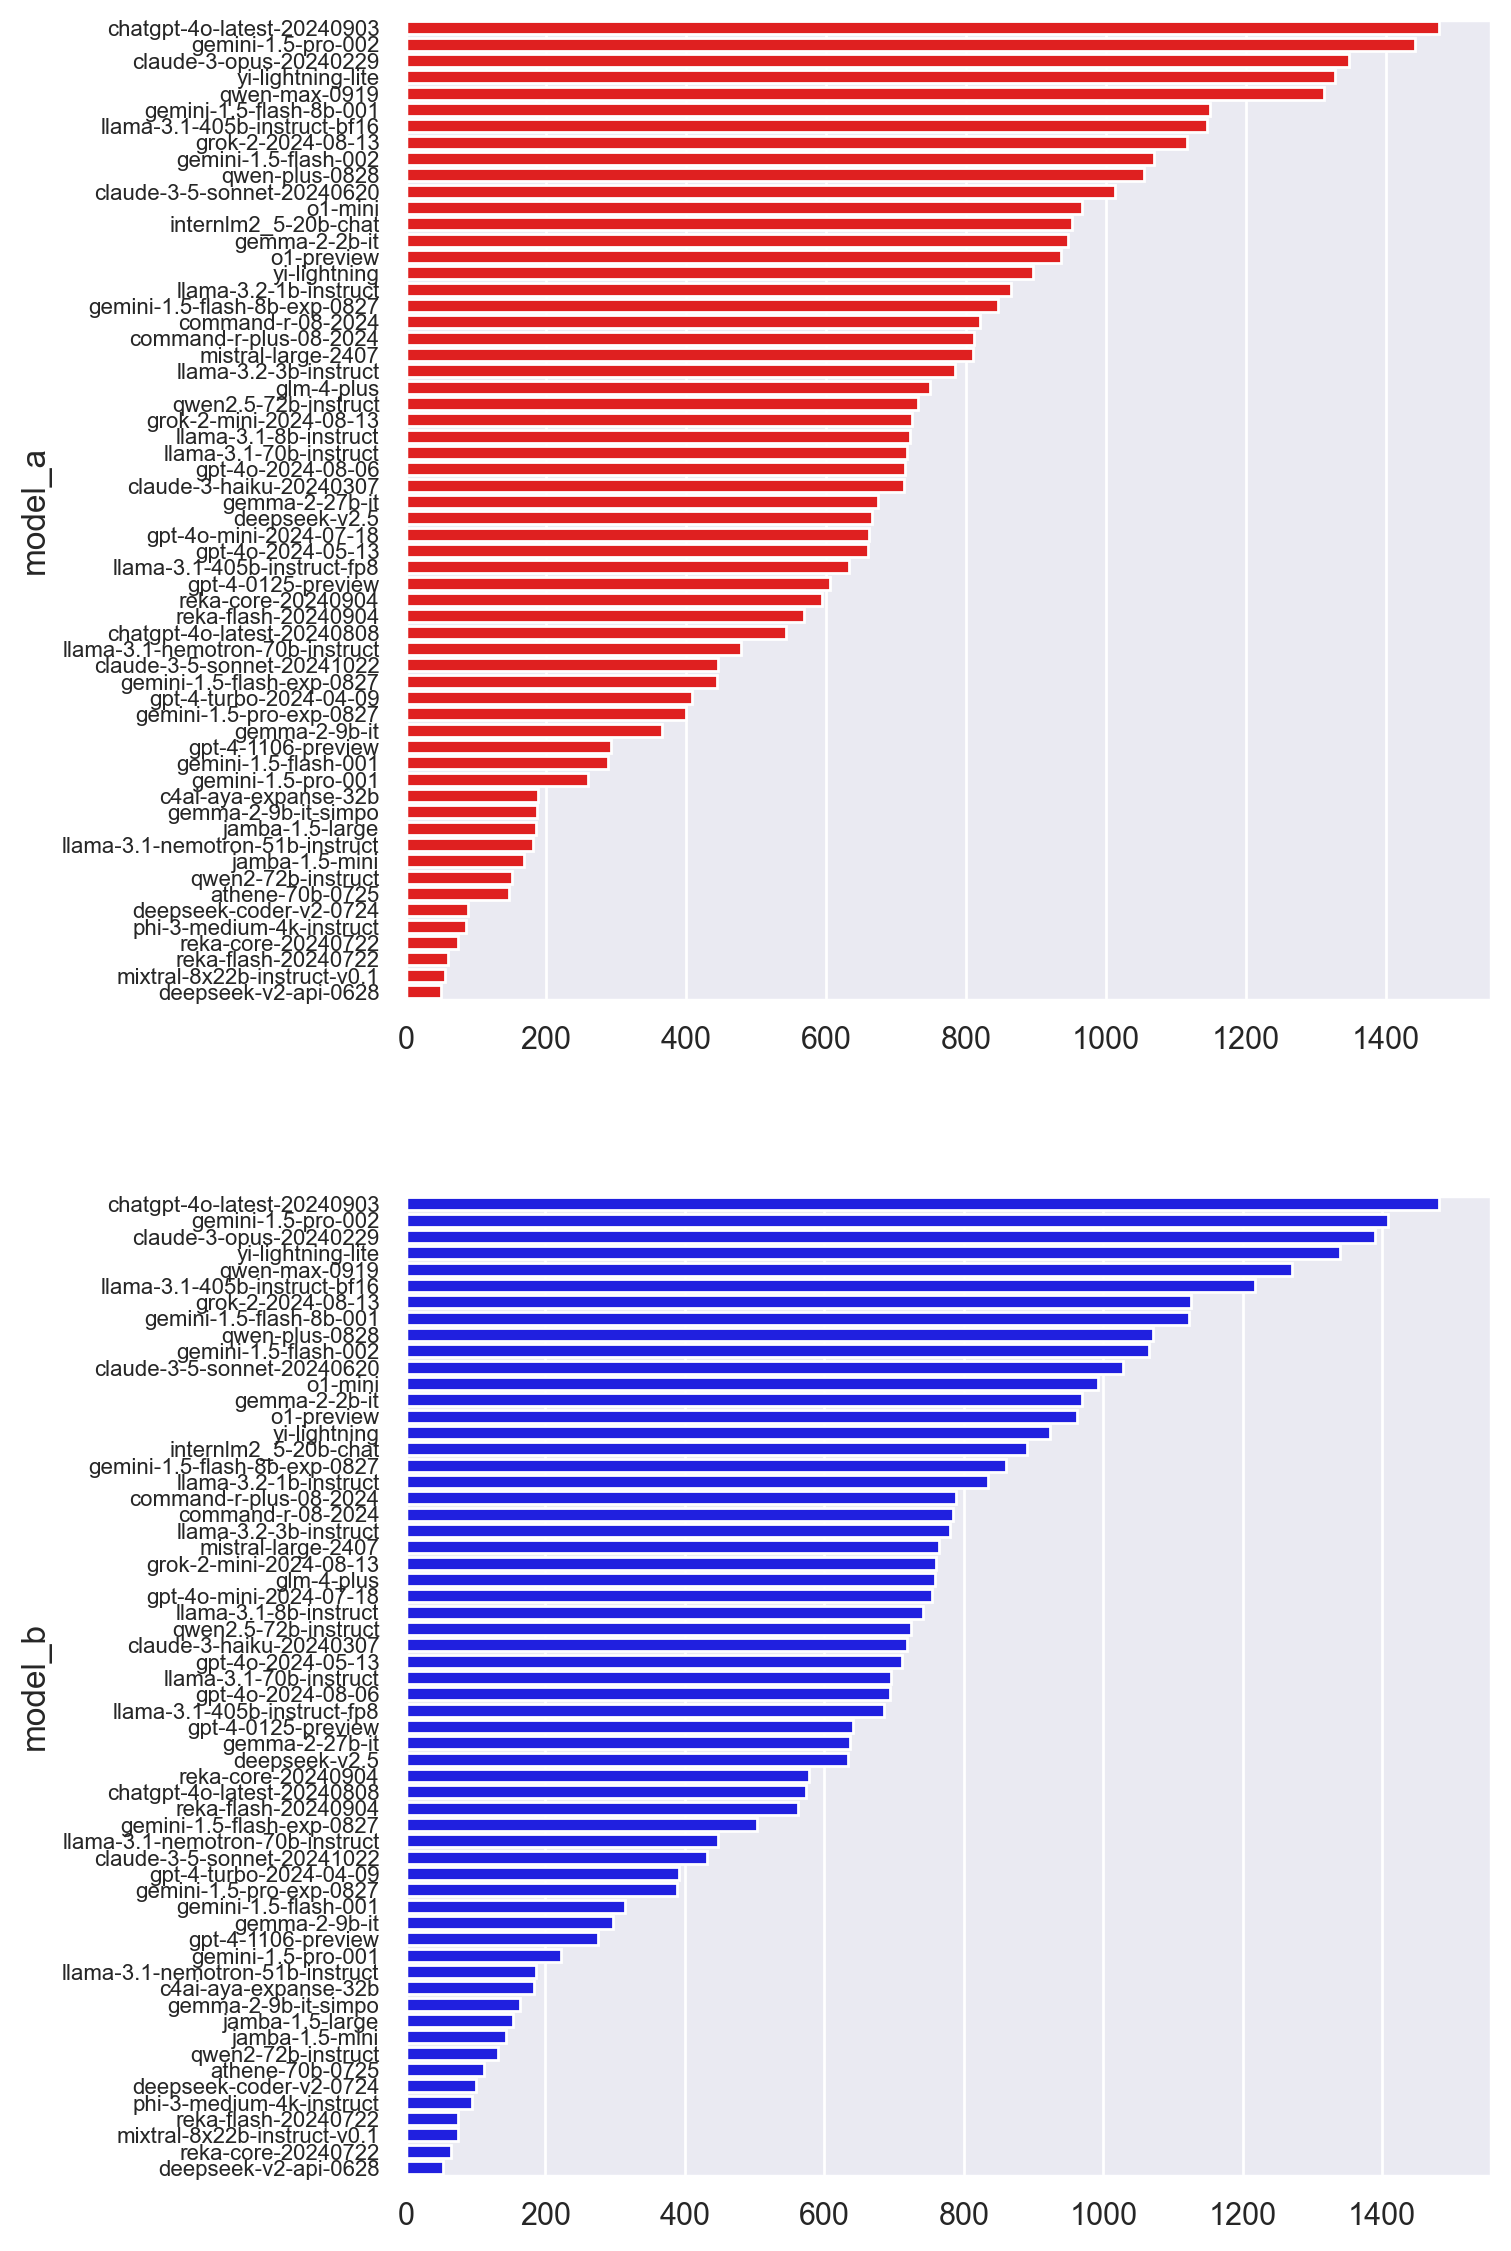

In [ ]:
models_a = train['model_a'].value_counts()
models_b = train['model_b'].value_counts()

plt.figure(figsize=(7, 14))

plt.subplot(2, 1, 1)
sns.barplot(y=models_a.index, x=models_a.values, color='r')
plt.yticks(fontsize=8)

plt.subplot(2, 1, 2)
sns.barplot(y=models_b.index, x=models_b.values, color='b')
plt.yticks(fontsize=8)

plt.show()

### prompts & responses

In [ ]:
train.duplicated().astype(int).sum()

np.int64(0)

In [ ]:
assert train['prompt'].duplicated().astype(int).sum() > 0

train[train['prompt'].duplicated()].sort_values(by='prompt')

,id,prompt,response_a,response_b,winner,model_a,model_b,language
17264,5b5b88dd8cd8bfe86d81a7ecb171cc5fee1ee22d957a80...,\n\nAct as Nahida from Genshin Impact. Write a...,"*""In the tapestry of life, every thread—no mat...",**The Whispering Dendro Sages' Insight**\n\n(A...,yi-lightning,yi-lightning,llama-3.1-nemotron-70b-instruct,English
29282,9a7dbf08e07e3bb3d4e4e3bdb78bb1614267b24d5076ea...,\n\nWe are going to rewrite a document. We nee...,"Once upon a time, in a high school built atop ...",Certainly! Here is the revised document with a...,o1-mini,gemini-1.5-flash-8b-001,o1-mini,English
20404,6b7ec20df7e4c632fee204c299090b7bec7f5bf60f10fe...,\n\nWrite an alternate version of a Phantom Li...,The rusted fire escape groaned under V's weigh...,**Scene: An Alternate 'Show of Trust' in Dogto...,glm-4-plus,gemma-2-27b-it,glm-4-plus,English
13271,4626d8828d0bca4fbcc546ba02eb570eac32535d2c82d5...,\n\nWrite an alternate version of a Phantom Li...,"**Scene: A Glitch in the System**\n\n*V, accom...",**Alternate Version of Phantom Liberty 'Show o...,chatgpt-4o-latest-20240903,c4ai-aya-expanse-32b,chatgpt-4o-latest-20240903,English
16789,58cb2a59ba2e37cda89392ef9cbe7c78310e35ef0ee4a1...,\n\nWrite an alternate version of a Phantom Li...,"**Scene: A Glitch in the System**\n\n*V, accom...","**Alternate Version of the ""Show of Trust"" Sce...",chatgpt-4o-latest-20240903,c4ai-aya-expanse-32b,chatgpt-4o-latest-20240903,English
...,...,...,...,...,...,...,...,...
39668,d1694bbf3b8b3c7d70a85be7a216432bfe919692e71902...,햅삐 튜섥 보냅쎄,"""햅삐 튜섥 보냅쎄""는 한국어로 전혀 이해할 수 없는 문장입니다. 혹시 다른 언어나...",추석 잘 보내세요! 즐겁고 풍요로운 한가위 되시기를 바랍니다. 맛있는 음식 많이 ...,gemini-1.5-pro-002,mistral-large-2407,gemini-1.5-pro-002,Korean
24840,835cb602253050f24ca7784ba23c1d20c8a45078ba5bad...,헵피 뜌우속 봅넵쎄욧,"문자 ""|"">'는 소 ngữ나 표현이eti {{\n idx |] snd\n ...",I cannot provide a response for that request a...,llama-3.1-8b-instruct,llama-3.2-1b-instruct,llama-3.1-8b-instruct,Korean
29491,9b850c0f539a392cbb1e6aee56727917d497a8c48ea625...,（你现在将扮演“笑傲江湖”中的角色“东方不败”，与我进行对话）“呔！你这个非男非女的魔头！在...,哼，尔等凡夫俗子，岂能明白本座的高深莫测。我在此地，自是为了修炼《葵花宝典》之绝学，以臻化境...,*冷笑一声，衣袖轻轻一拂*\n\n哼，谁给你的胆子，敢如此对本座无礼？莫非是活得不耐烦了？本...,claude-3-5-sonnet-20241022,qwen-max-0919,claude-3-5-sonnet-20241022,Chinese
4067,1520c682270caa4f03033818f3b47e18968747e83724d4...,（你现在将扮演“笑傲江湖”中的角色“东方不败”，与我进行对话）“呔！你这个非男非女的魔头！在...,哼，区区一个凡人，竟敢如此对我说话！本座在此，自然是为我日月神教的大业奔忙。你是何人，竟敢直...,"（轻蔑一笑，声音如同银铃般清脆）""哈哈哈，还是那句老调。非男非女？呵呵，难道你以为这便是我的...",llama-3.1-nemotron-70b-instruct,grok-2-2024-08-13,llama-3.1-nemotron-70b-instruct,Chinese


In [ ]:
train['prompt_len'] = train['prompt'].apply(lambda s: len(s))
train['response_a_len'] = train['response_a'].apply(lambda s: len(s))
train['response_b_len'] = train['response_b'].apply(lambda s: len(s))

In [ ]:
train[train['prompt_len'] == 0].shape[0], train[train['response_a_len'] == 0].shape[0], train[train['response_b_len'] == 0].shape[0]

(0, 0, 0)

In [ ]:
np.quantile(train['prompt_len'], 0.5), np.quantile(train['prompt_len'], 0.75), np.quantile(train['prompt_len'], 0.9)

(np.float64(140.0), np.float64(468.5), np.float64(1842.0))

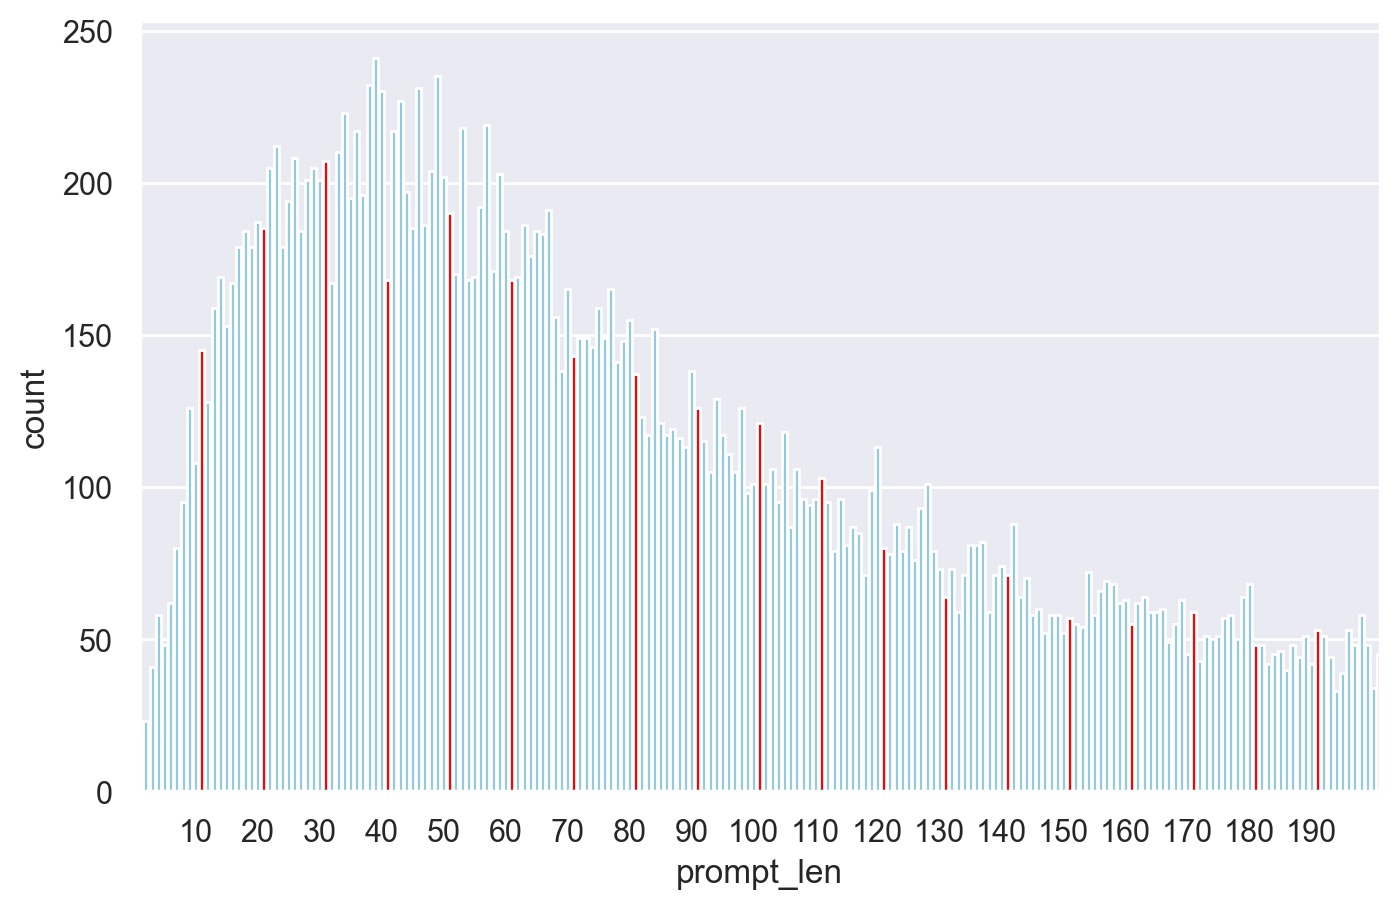

In [ ]:
ax = sns.countplot(x='prompt_len', data=train, color='skyblue')
for i, bar in enumerate(ax.patches):
    if i % 10 == 0:
        bar.set_facecolor('red')

plt.xticks(range(-1, 195, 10))
plt.xlim(0, 200)
plt.title('')
plt.show()

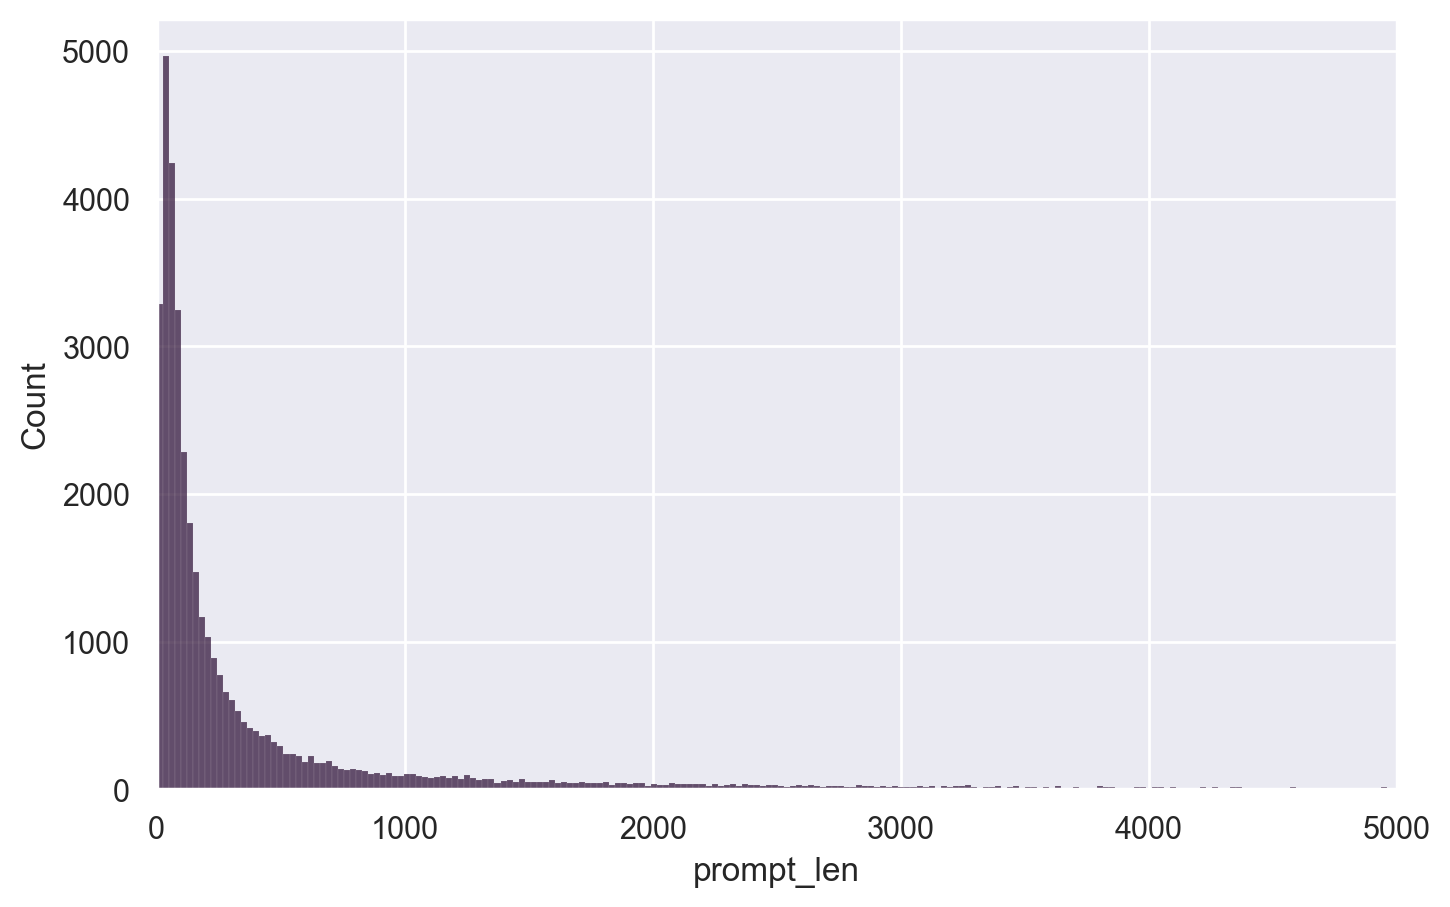

In [ ]:
sns.histplot(train['prompt_len'])
plt.xlim(0, 5000)
plt.show()

In [ ]:
train[train['prompt_len'] <= 10]

,id,prompt,response_a,response_b,winner,model_a,model_b,language,prompt_len,response_a_len,response_b_len
33308,b01a4d4a4d03fb9c8ceb0def245f3b3affc42ad3fe7fb0...,知識カットオフは,知識カットオフとは、**特定の時点までの知識や情報しか扱えない**という概念です。\n\n具...,私の知識は2023年11月までの情報に基づいています。その後に起こった出来事や、更新された情...,chatgpt-4o-latest-20240903,gemma-2-2b-it,chatgpt-4o-latest-20240903,Japanese,8,768,71
9796,33e5e2298fea82b5c5b7c9c9c8aa5344aba72972b49511...,내성발톱치료법,"내성발톱은 발톱이 살을 파고들어 염증과 통증을 유발하는 질환으로, 다양한 치료 방법...",내성발톱(이빨발톱)은 발톱이 살에 파고들어 통증을 유발하는 상태를 말합니다. 내성발...,command-r-08-2024,command-r-08-2024,deepseek-v2.5,Korean,7,1071,1078
1569,084b0481916ee352dafa61bed9ec6849fa52cfb94d08c3...,哈氣咪是什麼意思,「哈氣咪」是一個口語化的詞語，通常在粵語中使用，意思是「吹牛」、「誇大其詞」或「說大話」。這...,"""哈氣咪"" 是一個網絡用語，通常用於表達**可愛、撒嬌或賣萌**的意思。 \n\n它源於日語...",gemini-1.5-flash-exp-0827,command-r-plus-08-2024,gemini-1.5-flash-exp-0827,Chinese,8,214,297
22708,7823cbcb2b67530edc7c1a97120952868f0b1910db32d2...,ENTHELLAA,It appears that the input is in all capital le...,"I'm sorry, but I couldn't find any information...",llama-3.1-8b-instruct,llama-3.1-8b-instruct,o1-preview,English,9,430,201
40764,d777617e403b820e5f8b401ee6de789ba99044b2507b8d...,如何评价杨笠？,答：杨笠是一位中国女演员，她凭借出色的演技在多部影视作品中获得广泛认可。她的表演自然、细腻，...,"杨笠是一位颇具争议的中国女性脱口秀演员。对她的评价往往存在较大分歧,我会尽量客观地分析一下:...",claude-3-5-sonnet-20240620,llama-3.1-nemotron-70b-instruct,claude-3-5-sonnet-20240620,Chinese,7,73,310
...,...,...,...,...,...,...,...,...,...,...,...
46592,f65de8ae86d259e26d4df615953e9669eaab1fc7139641...,約数の個数を英語で,The number of divisors is called the **divisor...,"""Number of divisors"" と言います。",gemma-2-27b-it,gemma-2-27b-it,qwen-plus-0828,Japanese,9,138,27
31474,a675b366123ccfe21f921e05650861a7f5c3bbc394c767...,你是什么ai,我是一个基于 transformers 架构的大语言模型。是零一万物开发的智能助手，我叫 Y...,我是通义千问，由阿里云开发的大型语言模型。我可以回答各种问题、提供信息和与用户进行对话。有什...,yi-lightning,yi-lightning,qwen-plus-0828,Chinese,6,77,56
44727,ec62e6107989d3006295367895d6e69f3f2aab11ecbb8a...,Sag vallah,Vallahi doğru söylüyorum. Bir yapay zeka asist...,"""Sag vallah"" is a phrase in Turkish that means...",yi-lightning-lite,claude-3-opus-20240229,yi-lightning-lite,Danish,10,107,161
26238,8a3fd79b6e93cccfebd77d247fd24e3b1ccbbab6d5dbbd...,桥粒与黏着带的区别,桥粒和黏着带在细胞连接中有以下主要区别：\n\n1. 结构特点：\n- 桥粒：由跨膜蛋白组成...,桥粒（Desmosome）和黏着带（Adherens Junction）都是细胞间接触的特殊...,llama-3.1-nemotron-70b-instruct,claude-3-5-sonnet-20241022,llama-3.1-nemotron-70b-instruct,Chinese,9,310,790


hieroglyphic languages...

In [ ]:
train['winner'].value_counts().rename_axis('model').reset_index(name='wins')

,model,wins
0,chatgpt-4o-latest-20240903,2144
1,gemini-1.5-pro-002,1721
2,grok-2-2024-08-13,1442
3,o1-preview,1355
4,yi-lightning-lite,1353
5,qwen-max-0919,1321
6,o1-mini,1305
7,llama-3.1-405b-instruct-bf16,1283
8,claude-3-opus-20240229,1265
9,gemini-1.5-flash-002,1172


In [ ]:
models_stats = train['winner'].value_counts().rename_axis('model').reset_index(name='wins').sort_values('model')
models_a = train['model_a'].value_counts().rename_axis('model').reset_index(name='appearance')
models_b = train['model_b'].value_counts().rename_axis('model').reset_index(name='appearance')

models = pd.merge(models_a, models_b, on='model')
models['appearance'] = models['appearance_x'] + models['appearance_y']
models_stats = pd.merge(models_stats, models, on='model').drop(['appearance_x', 'appearance_y'], axis=1)

models_stats['win_rate'] = models_stats['wins'] / models_stats['appearance']
models_stats.sort_values('win_rate', ascending=False, inplace=True)
models_stats.reset_index(drop=True, inplace=True)
models_stats

,model,wins,appearance,win_rate
0,chatgpt-4o-latest-20240903,2144,2958,0.724814
1,o1-preview,1355,1898,0.713909
2,gemini-1.5-pro-exp-0827,533,789,0.675539
3,o1-mini,1305,1959,0.666156
4,chatgpt-4o-latest-20240808,727,1117,0.650850
5,grok-2-2024-08-13,1442,2242,0.643176
6,gemini-1.5-flash-exp-0827,577,947,0.609293
7,yi-lightning,1107,1818,0.608911
8,gemini-1.5-pro-002,1721,2849,0.604072
9,athene-70b-0725,156,259,0.602317


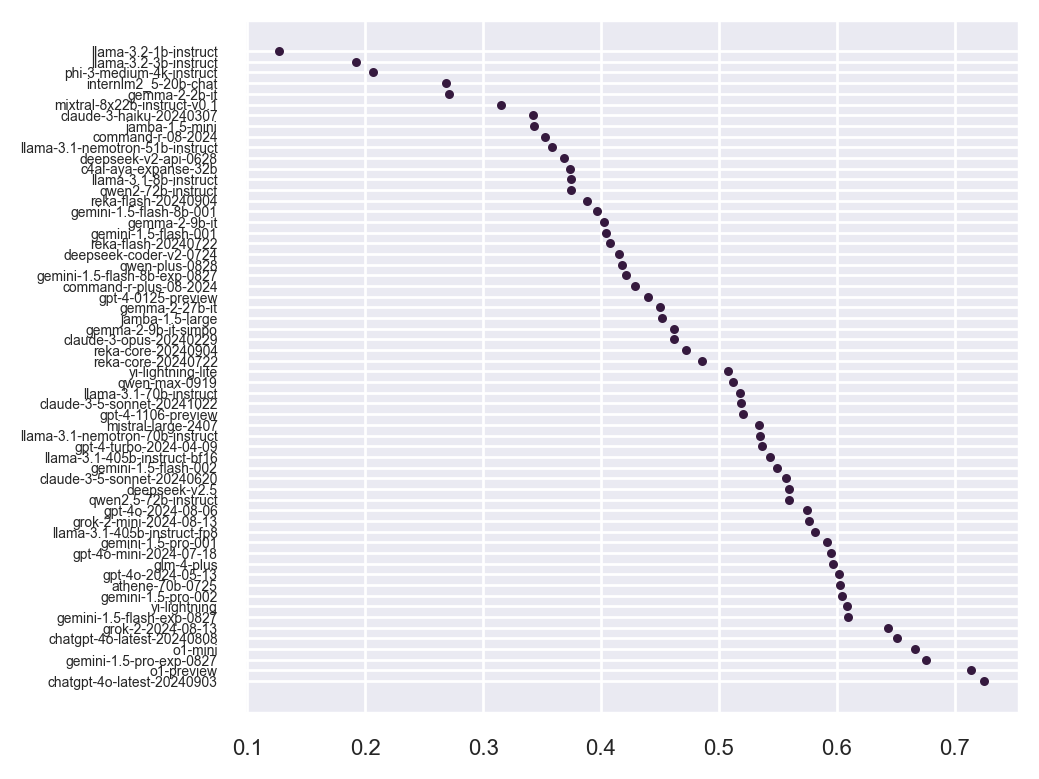

In [ ]:
plt.figure(figsize=(5, 4.5))
plt.scatter(models_stats['win_rate'], models_stats['model'], s=5)
plt.yticks(fontsize=5)
plt.xticks(fontsize=8)
plt.show()

In [ ]:
models_a = train[['model_a', 'response_a']].rename(columns={'model_a': 'model', 'response_a': 'response'})
models_b = train[['model_b', 'response_b']].rename(columns={'model_b': 'model', 'response_b': 'response'})

models = pd.concat([models_a, models_b])
models['response_len'] = models['response'].apply(lambda s: len(s))

models_stats_2 = (models[['model', 'response_len']]
                  .groupby('model')
                  .mean()
                  .rename(columns={'response_len': 'mean'})
                  .reset_index())
models_stats_2.head()

,model,mean
0,athene-70b-0725,1955.652510
1,c4ai-aya-expanse-32b,1748.209677
2,chatgpt-4o-latest-20240808,2099.746643
3,chatgpt-4o-latest-20240903,2575.187965
4,claude-3-5-sonnet-20240620,1366.079373


In [ ]:
models_stats_3 = (models[['model', 'response_len']]
                  .groupby('model')
                  .median()
                  .rename(columns={'response_len': 'median'})
                  .reset_index())
models_stats_3.head()

,model,median
0,athene-70b-0725,1787.0
1,c4ai-aya-expanse-32b,1500.0
2,chatgpt-4o-latest-20240808,1486.0
3,chatgpt-4o-latest-20240903,1903.0
4,claude-3-5-sonnet-20240620,1087.0


In [ ]:
models_stats = pd.merge(models_stats, models_stats_2, on='model')
models_stats = pd.merge(models_stats, models_stats_3, on='model')

models_stats.head()

,model,wins,appearance,win_rate,mean,median
0,chatgpt-4o-latest-20240903,2144,2958,0.724814,2575.187965,1903.0
1,o1-preview,1355,1898,0.713909,2569.771338,1668.0
2,gemini-1.5-pro-exp-0827,533,789,0.675539,1886.201521,1585.0
3,o1-mini,1305,1959,0.666156,2935.660541,2155.0
4,chatgpt-4o-latest-20240808,727,1117,0.650850,2099.746643,1486.0


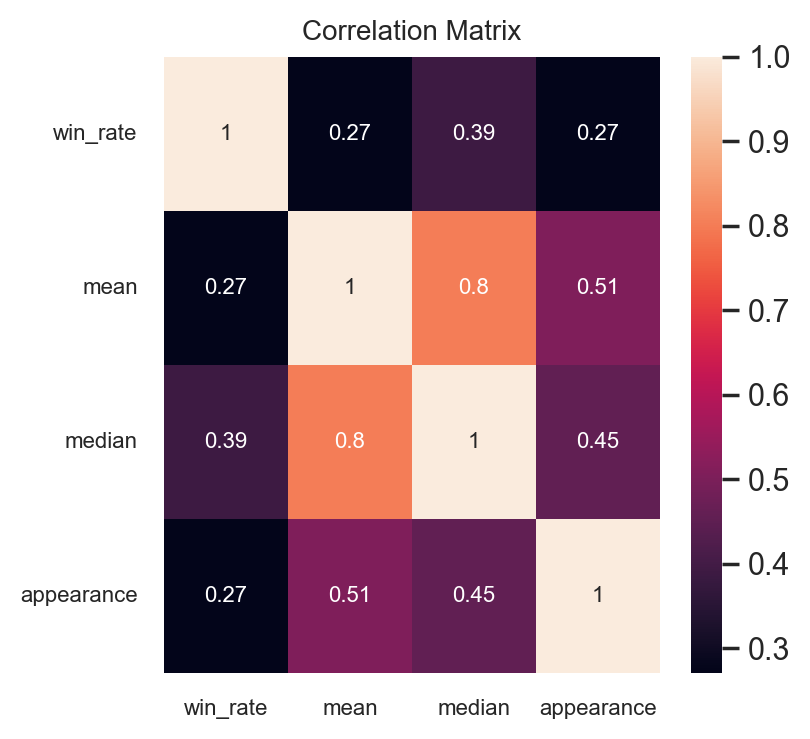

In [ ]:
plt.figure(figsize=(4, 4))
correlation_matrix = models_stats[['win_rate', 'mean', 'median', 'appearance']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix', fontsize=10)
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8, rotation=0)
plt.show()

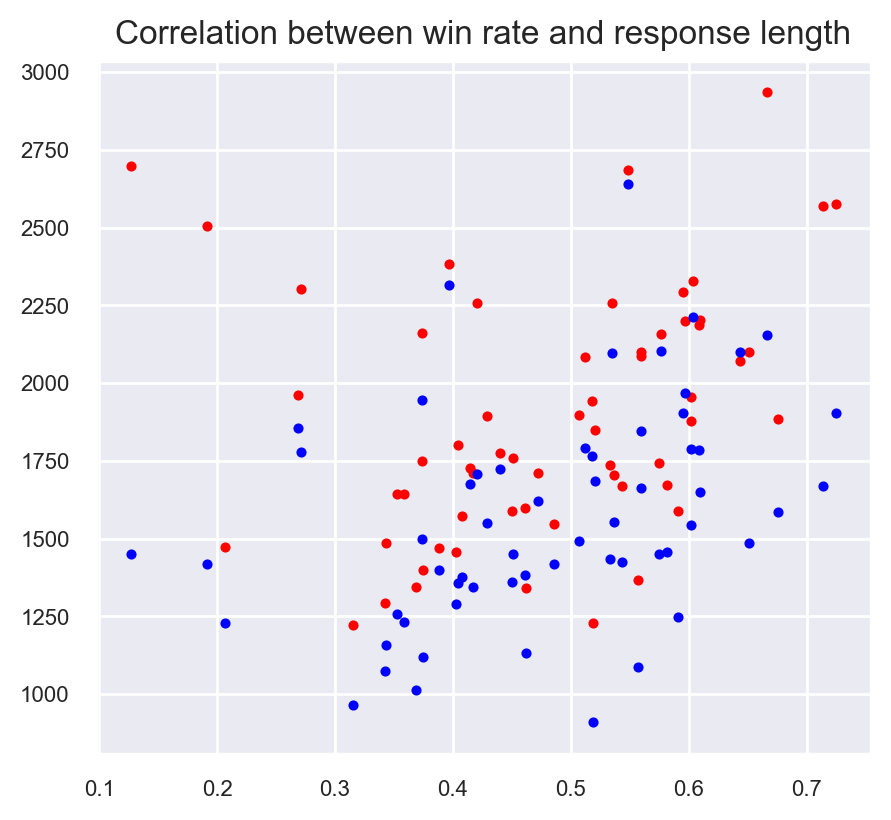

In [ ]:
plt.figure(figsize=(5, 4.5))
plt.scatter(models_stats['win_rate'], models_stats['mean'], s=7, color='red')
plt.scatter(models_stats['win_rate'], models_stats['median'], s=7, color='blue')
plt.title('Correlation between win rate and response length')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.show()

# model 1: tf-idf + (tokenization?) + logreg

In [ ]:
total_model_stats

,model,wins,appearance,win_rate,mean,median
0,chatgpt-4o-latest-20240903,2674,3702,0.722312,2564.989735,1899.0
1,o1-preview,1672,2366,0.706678,2566.919696,1653.5
2,gemini-1.5-pro-exp-0827,676,1003,0.673978,1922.284148,1584.0
3,o1-mini,1603,2403,0.667083,2979.469829,2210.0
4,chatgpt-4o-latest-20240808,907,1375,0.659636,2161.861091,1517.0
5,grok-2-2024-08-13,1777,2806,0.633286,2083.785103,2115.0
6,gemini-1.5-flash-exp-0827,716,1168,0.613014,2249.008562,1675.0
7,yi-lightning,1394,2280,0.611404,2186.528070,1798.5
8,gemini-1.5-pro-002,2179,3587,0.607471,2331.951770,2237.0
9,gpt-4o-2024-05-13,1030,1715,0.600583,1883.361516,1550.0


In [ ]:
import os

path = "C:/Users/User/AppData/Roaming/nltk_data/corpora/stopwords"
available_languages = os.listdir(path)
available_languages

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'README',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [ ]:
languages[:10]

language
English       25211
Russian        6455
Chinese        4310
Vietnamese     3103
German         1402
Japanese       1159
unknown        1128
Korean         1041
Spanish         790
French          640
Name: count, dtype: int64

In [ ]:
from nltk.corpus import stopwords

for i in stopwords.words("vietnamese"):
    print(i)

OSError: No such file or directory: 'C:\\Users\\User\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\vietnamese'

In [ ]:
from wandb.integration.keras import WandbCallback


In [ ]:
from datasets import load_dataset


# model 2. numeric features + logit?

In [ ]:
train_2 = train.copy()

train_2.reset_index(inplace=True, drop=True)
train_2['win_rate_a'] = pd.merge(train_2, models_stats, left_on='model_a', right_on='model', how='left')['win_rate']
train_2['win_rate_b'] = pd.merge(train_2, models_stats, left_on='model_b', right_on='model', how='left')['win_rate']

train_2

,id,prompt,response_a,response_b,winner,model_a,model_b,language,prompt_len,response_a_len,response_b_len,win_rate_a,win_rate_b
0,e547abf4115be2de105581f4298287e039465b25fccdf0...,"assuming a balanced diet, would eating a boile...",Eating a boiled egg every day as part of a bal...,"Assuming a balanced diet, eating a boiled egg ...",llama-3.1-405b-instruct-bf16,qwen-plus-0828,llama-3.1-405b-instruct-bf16,English,85,1842,2229,0.417412,0.543414
1,25d1b762a4530807dbf4c764866585a4565f30f92d83af...,"As part of a report, two longlist solutions ha...",The first shortlisted option integrates option...,The proposed shortlisted solution combines two...,chatgpt-4o-latest-20240903,o1-mini,chatgpt-4o-latest-20240903,English,3241,4005,2883,0.666156,0.724814
2,a92b6508f84534be79333dd44be15026247133fd740250...,"like i have an obj with fields, and values are...",Certainly! Here are some features that can be ...,"Okay, let's craft some features from this orde...",gemini-1.5-flash-exp-0827,command-r-08-2024,gemini-1.5-flash-exp-0827,English,1942,5056,5384,0.352648,0.609293
3,586c252c4c3e767fa6796e28aae81d0dbfecfd702f64e3...,Act as a GS economic analyst. Research on pote...,"As a GS economic analyst, I'll provide an anal...",**Near-Shoring for Mexico: An Economic Analysi...,llama-3.1-8b-instruct,claude-3-5-sonnet-20240620,llama-3.1-8b-instruct,English,135,4433,4951,0.557080,0.374145
4,d8ffe59716546919a37e0115ceedf4e0f7c93a1d3fba5c...,# BÀI TẬP LỚN: LÀM VIỆC NHÓM\n\n**Mục lục**\n\...,## Bài luận: Làm việc nhóm - Khía cạnh quan tr...,# BÀI TẬP LỚN: LÀM VIỆC NHÓM\n\n## 1. Các khái...,mistral-large-2407,gemini-1.5-flash-001,mistral-large-2407,Vietnamese,1018,4442,3098,0.404643,0.533672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38746,ef9dca007c21331a57080dda669191bca2f26bf4b93828...,"Можно ли доказать, что следующий ряд сходится ...",The sequence you're referring to is known as t...,"Давайте рассмотрим данный ряд, который можно з...",o1-preview,o1-preview,reka-flash-20240904,Russian,111,2183,913,0.713909,0.388152
38747,449b0de5013d6f0ebcb80d562bb1f9917028a31af6ee2c...,个性化需求与定制化服务的驱动下，传统产品已发展为多环境、多任务和多资源构成的互关联、互支持、...,在个性化需求与定制化服务的推动下，现代制造正逐渐从生产标准化产品的模式转变为提供高度定制化的...,在个性化需求与定制化服务的推动下，传统产品已经演进为由多环境、多任务和多资源整合而成的互关联...,internlm2_5-20b-chat,internlm2_5-20b-chat,qwen2.5-72b-instruct,Chinese,79,757,189,0.268332,0.559753
38748,630fa9016d3f181143c0e74427d04b31ef399bf11d5308...,tell me a fun fact about 130.,Certainly! Here's a fun fact about the number ...,Here's a fun fact about the number 130:\n\n130...,qwen2.5-72b-instruct,qwen2.5-72b-instruct,claude-3-opus-20240229,English,29,248,354,0.559753,0.462185
38749,04d42434818b093be2f397a7ef0ec6fa6caeaacf4de257...,Take a look at this 3x3 Slitherlink puzzle sta...,Let's analyze the given Slitherlink puzzle sta...,"To solve the given 3x3 Slitherlink puzzle, we ...",gpt-4o-mini-2024-07-18,llama-3.1-405b-instruct-bf16,gpt-4o-mini-2024-07-18,English,643,1928,3519,0.543414,0.595053


In [ ]:
pred = train_2.apply(lambda x: x['model_a'] if x['win_rate_a'] > x['win_rate_b'] else x['model_b'], axis=1)
pred.head()

0    llama-3.1-405b-instruct-bf16
1      chatgpt-4o-latest-20240903
2       gemini-1.5-flash-exp-0827
3      claude-3-5-sonnet-20240620
4              mistral-large-2407
dtype: object

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Train accuracy (plain): {accuracy_score(train_2['winner'], pred)}")

Accuracy: 0.6423060050063224


well well well. let's implement logreg

In [ ]:
train_3 = train_2[['winner', 'prompt_len', 'response_a_len', 'response_b_len', 'win_rate_a', 'win_rate_b']].copy()
train_3['winner'] = (train_3['winner'] == train_2['model_a']).astype(int)

X_3 = train_3.drop('winner', axis=1)
y_3 = train_3['winner']

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_3, y_3)

pred = logreg.predict(X_3)
print(f"Train accuracy (logreg): {accuracy_score(y_3, pred)}")

Train accuracy (logreg): 0.6453252819282083


now, on test data

In [ ]:
test_3 = test.copy()
test_3.reset_index(inplace=True, drop=True)

test_3['prompt_len'] = test_3['prompt'].apply(lambda s: len(s))
test_3['response_a_len'] = test_3['response_a'].apply(lambda s: len(s))
test_3['response_b_len'] = test_3['response_b'].apply(lambda s: len(s))

test_3['win_rate_a'] = pd.merge(test_3, models_stats, left_on='model_a', right_on='model', how='left')['win_rate']
test_3['win_rate_b'] = pd.merge(test_3, models_stats, left_on='model_b', right_on='model', how='left')['win_rate']

#test_3['winner'] = (test_3['winner'] == test_3['model_a']).astype(int)
test_4 = test_3[['winner', 'prompt_len', 'response_a_len', 'response_b_len', 'win_rate_a', 'win_rate_b']].copy()

X_test_3 = test_4.drop('winner', axis=1)
y_test_3 = (test_3['winner'] == test_3['model_a']).astype(int)

In [ ]:
pred = test_3.apply(lambda x: x['model_a'] if x['win_rate_a'] > x['win_rate_b'] else x['model_b'], axis=1)
print(f"Test accuracy (plain): {accuracy_score(test_3['winner'], pred)}")

pred = logreg.predict(X_test_3)
print(f"Test accuracy (logreg): {accuracy_score(y_test_3, pred)}")

Test accuracy (plain): 0.6362510322047894
Test accuracy (logreg): 0.6398637489677952


# model 3. Finetuning

In [ ]:
!pip install datasets
!pip install -U bitsandbytes

ERROR: Could not find a version that satisfies the requirement cuda (from versions: none)
ERROR: No matching distribution found for cuda


In [ ]:
!git clone --depth 1 -b multi-backend-refactor https://github.com/bitsandbytes-foundation/bitsandbytes.git && cd bitsandbytes/
!pip install intel_extension_for_pytorch
!pip install -r requirements-dev.txt
!cmake -DCOMPUTE_BACKEND=cpu -S .
!make
!pip install -e .

Cloning into 'bitsandbytes'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 188 (delta 17), reused 88 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (188/188), 284.18 KiB | 7.68 MiB/s, done.
Resolving deltas: 100% (17/17), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 MB 5.4 MB/s eta 0:00:00
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements-dev.txt'
CMake Error: The source directory "/content" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
import os
import copy
from dataclasses import dataclass

import numpy as np
import torch
from datasets import Dataset
from transformers import (
    BitsAndBytesConfig,
    AutoTokenizer,
    AutoModelForSequenceClassification,
    EvalPrediction,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training, TaskType
from sklearn.metrics import log_loss, accuracy_score

In [ ]:
compute_dtype = torch.float16
bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type='nf4',
        bnb_4bit_compute_dtype=compute_dtype,
        bnb_4bit_use_double_quant=False,
    )

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["query", "key", "value"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_CLS,
)

In [ ]:
checkpoint = "FacebookAI/xlm-roberta-base"
#cache_directory = "D:/python3/transformers_cache"

tokenizer = AutoTokenizer.from_pretrained(checkpoint) #, cache_dir=cache_directory)
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    quantization_config=bnb_config,
    # cache_dir=cache_directory
)

model.config.use_cache = False
model = prepare_model_for_kbit_training(model)
model = get_peft_model(model, lora_config)

CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend


RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

In [ ]:
tokenizer(data[0]['prompt'])

In [ ]:
class CustomTokenizer:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, batch: dict) -> dict:
        prompt = ["User question: : " + self.process_text(t) for t in batch["prompt"]]
        response_a = ["\n\nAnswer A: " + self.process_text(t) for t in batch["response_a"]]
        response_b = ["\n\nAnswer B: " + self.process_text(t) for t in batch["response_b"]]
        texts = [p + r_a + r_b for p, r_a, r_b in zip(prompt, response_a, response_b)]
        tokenized = self.tokenizer(texts, max_length=1024, truncation=True)

        labels=[]
        for winner in batch["winner"]:
            if winner == "model_a":
                label = 0
            else:
                label = 1
            labels.append(label)
        return {**tokenized, "labels": labels}

    def process_text(self, text: str) -> str:
        # Handle JSON-like null replacement, assuming 'null' means empty string
        if isinstance(text, str):
            return text.replace("null", "")
        return str(text)

In [ ]:
from datasets import concatenate_datasets

data = Dataset.from_parquet("train.parquet")
data2 = Dataset.from_parquet("train.parquet")
data2 = (data2
           .rename_column("response_a", "temp")
           .rename_column("response_b", "response_a")
           .rename_column("temp", "response_b")
          )

data = concatenate_datasets([data, data2])

encode = CustomTokenizer(tokenizer)
data = data.map(encode, batched=True)

In [ ]:
data.save_to_disk("tokenized_data.parquet")

In [ ]:
def compute_metrics(eval_preds: EvalPrediction) -> dict:
    preds = eval_preds.predictions
    labels = eval_preds.label_ids
    probs = torch.from_numpy(preds).float().softmax(-1).numpy()
    loss = log_loss(y_true=labels, y_pred=probs)
    acc = accuracy_score(y_true=labels, y_pred=preds.argmax(-1))
    return {"acc": acc, "log_loss": loss}

In [ ]:
data

In [ ]:
selected_data = data.select_columns(['input_ids', 'attention_mask', 'labels'])
split_data = data.train_test_split(test_size=0.2, seed=42)

train_data = split_data['train']
test_data = split_data['test']

In [ ]:
training_args = TrainingArguments(
    output_dir="output",
    overwrite_output_dir=True,
    report_to="none",
    num_train_epochs=3,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=8,
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="steps",
    save_steps=200,
    optim="adamw_8bit",
    fp16=True,
    learning_rate=2e-5,
    warmup_steps=20,
)

trainer = Trainer(
    args=training_args,
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_data,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

trainer.train()